In [1]:
#Machine learning Model on FIFA

In [1]:
import pandas as pd
import openpyxl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_excel('Book1.xlsx')

In [4]:
df.shape

(1001, 89)

In [5]:
df.head()

Unnamed: 0      ID           Name  Age   
0         372  193105      A. Areola   25  \
1         152  137186    A. Barzagli   37   
2         704  172723     A. Begović   31   
3         252  208596     A. Belotti   24   
4         978  192073  A. Bertolacci   27   

                                            Photo         Nationality   
0  https://cdn.sofifa.org/players/4/19/193105.png              France  \
1  https://cdn.sofifa.org/players/4/19/137186.png               Italy   
2  https://cdn.sofifa.org/players/4/19/172723.png  Bosnia Herzegovina   
3  https://cdn.sofifa.org/players/4/19/208596.png               Italy   
4  https://cdn.sofifa.org/players/4/19/192073.png               Italy   

                                  Flag  Overall  Potential   
0  https://cdn.sofifa.org/flags/18.png       81         85  \
1  https://cdn.sofifa.org/flags/27.png       84         84   
2   https://cdn.sofifa.org/flags/8.png       79         79   
3  https://cdn.sofifa.org/flags/27.png       82         87   
4  https://cdn.sofifa.org/flags/27.png       77         77   

                  Club                                      Club Logo Value   
0  Paris Saint-Germain    https://cdn.sofifa.org/teams/2/light/73.png  16.5  \
1             Juventus    https://cdn.sofifa.org/teams/2/light/45.png   4.2   
2          Bournemouth  https://cdn.sofifa.org/teams/2/light/1943.png   7.5   
3               Torino    https://cdn.sofifa.org/teams/2/light/54.png    30   
4                Milan    https://cdn.sofifa.org/teams/2/light/47.png     9   

   Wage  Special Preferred Foot  International Reputation  Weak Foot   
0    61     1266          Right                         2          3  \
1    95     1740          Right                         3          3   
2    52     1234          Right                         3          2   
3    58     1962          Right                         3          5   
4    75     2041           Left                         2          3   

   Skill Moves       Work Rate Body Type Real Face Position  Jersey Number   
0            1  Medium/ Medium    Normal       Yes       GK             23  \
1            2       Low/ High    Normal       Yes       CB             15   
2            1  Medium/ Medium      Lean       Yes       GK             27   
3            3      High/ High    Normal       Yes       LS              9   
4            4  Medium/ Medium    Normal        No       CM             16   

         Joined Loaned From Contract Valid Until Height  Weight    LS    ST   
0   Jul 1, 2010         NaN                 2019    6'5     207   NaN   NaN  \
1   Jan 1, 2011         NaN                 2019    6'2     192  52+3  52+3   
2  May 30, 2017         NaN                 2020    6'6     183   NaN   NaN   
3  Aug 17, 2015         NaN                 2021   5'11     159  80+3  80+3   
4   Jul 2, 2015         NaN                 2019   5'10     165  72+2  72+2   

     RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM   
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  \
1  52+3  54+3  55+3  55+3  55+3  54+3  57+3  57+3  57+3  57+3  63+3  63+3   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  80+3  73+3  77+3  77+3  77+3  73+3  72+3  72+3  72+3  71+3  64+3  64+3   
4  72+2  74+2  74+2  74+2  74+2  74+2  76+2  76+2  76+2  75+2  76+2  76+2   

    RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB   
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  \
1  63+3  57+3  71+3  75+3  75+3  75+3  71+3  74+3  82+3  82+3  82+3  74+3   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  64+3  71+3  56+3  55+3  55+3  55+3  56+3  54+3  55+3  55+3  55+3  54+3   
4  76+2  75+2  73+2  73+2  73+2  73+2  73+2  72+2  70+2  70+2  70+2  72+2   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling   
0        20         19               14            41       16   

In [6]:
df.info

<bound method DataFrame.info of       Unnamed: 0      ID            Name  Age   
0            372  193105       A. Areola   25  \
1            152  137186     A. Barzagli   37   
2            704  172723      A. Begović   31   
3            252  208596      A. Belotti   24   
4            978  192073   A. Bertolacci   27   
...          ...     ...             ...  ...   
996          775  216393    Y. Tielemans   21   
997          455  205705       Z. Feddal   28   
998          109   41236  Z. Ibrahimović   36   
999          859  173474    Z. Junuzović   30   
1000         621  203757         Zé Luís   27   

                                               Photo         Nationality   
0     https://cdn.sofifa.org/players/4/19/193105.png              France  \
1     https://cdn.sofifa.org/players/4/19/137186.png               Italy   
2     https://cdn.sofifa.org/players/4/19/172723.png  Bosnia Herzegovina   
3     https://cdn.sofifa.org/players/4/19/208596.png               Italy   

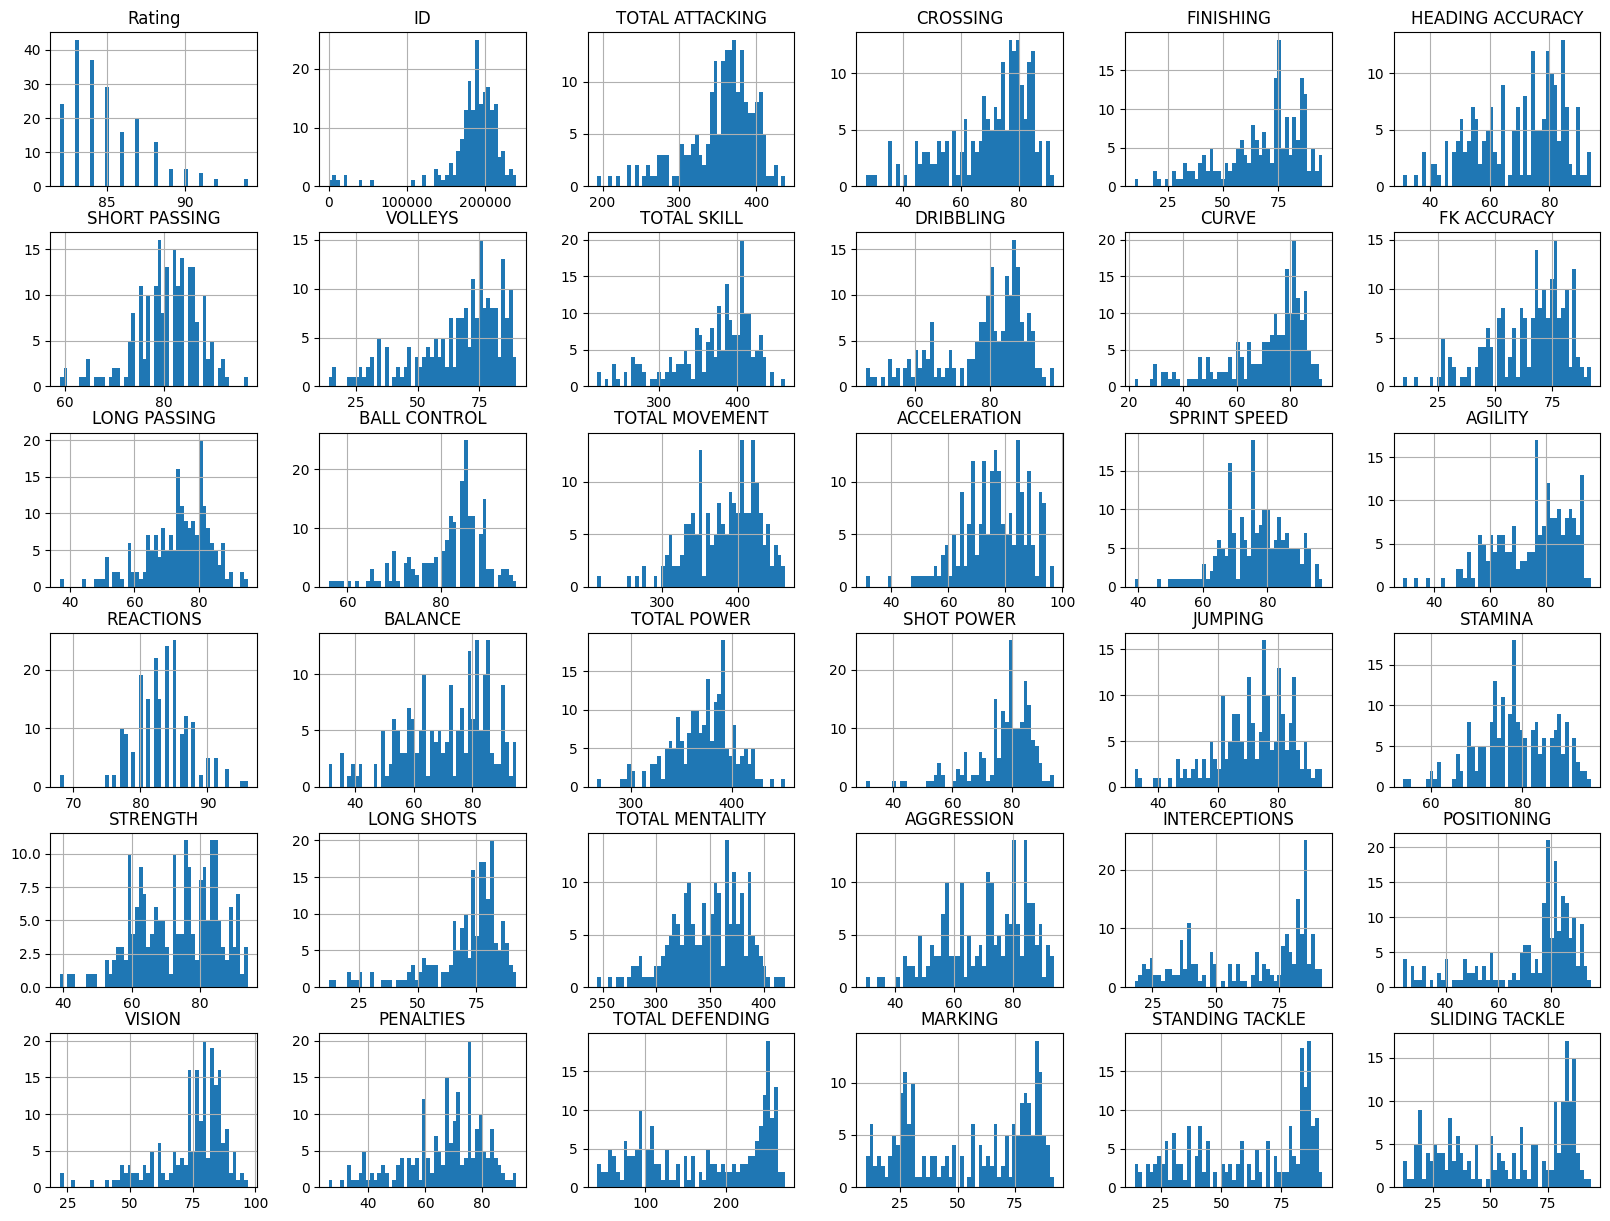

In [114]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

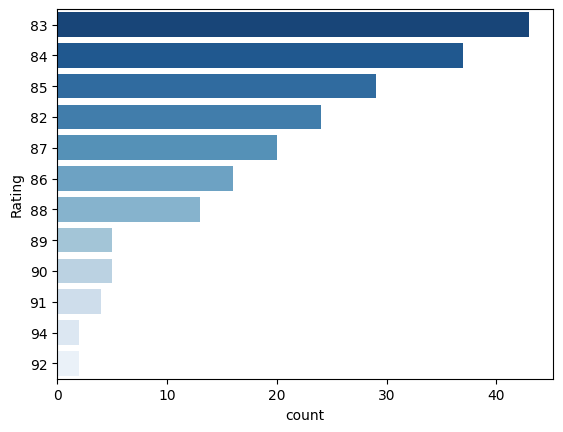

In [115]:
sns.countplot(y="Rating", 
              data=df,
              label="Rating of Footballers",
              palette='Blues_r',
              order=df['Rating'].value_counts().index)
plt.show()

In [9]:
sns.pairplot(df,
             corner=True,
             kind='scatter',
             palette='Blues_r')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from pandas.core.apply import frame_apply
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import ElasticNet

from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from sklearn.tree._tree import Tree
import graphviz

In [8]:
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Weight'].fillna('200lbs', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Loaned From'].fillna('None', inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['Jersey Number'].fillna(8, inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)
df.fillna(0, inplace = True)

In [9]:
X = df[['Potential',
        'Crossing',
        'Finishing',
        'HeadingAccuracy',
        'ShortPassing',
        'Volleys',
        'Dribbling',
        'Curve',
        'FKAccuracy',
        'LongPassing',
        'BallControl',
        'Acceleration',
        'SprintSpeed',
        'Agility',
        'Reactions',
        'Balance',
        'ShotPower',
        'Jumping',
        'Stamina',
        'Strength',
        'LongShots',
        'Aggression',
        'Interceptions',
        'Positioning',
        'Vision',
        'Penalties',
        'Composure',
        'Marking',
        'StandingTackle',
        'SlidingTackle',
        'GKDiving',
        'GKHandling',
        'GKKicking',
        'GKPositioning',
        'GKReflexes']]

target = df[['Overall',
             'ID',
             'Name']]      

In [10]:
X.info

<bound method DataFrame.info of       Potential  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys   
0            85        20         19               14            41       16  \
1            84        40         21               72            65       35   
2            79        14         19               12            26       12   
3            87        42         88               84            68       80   
4            77        72         62               64            80       69   
...         ...       ...        ...              ...           ...      ...   
996          87        76         73               57            78       78   
997          80        57         40               79            76       39   
998          85        73         86               83            79       86   
999          78        83         68               58            77       82   
1000         80        45         74               83            67       75   

      D

In [11]:
Y_Rating = target[['Overall', 'ID']]

In [12]:
Y_Rating.head()

Overall      ID
0       81  193105
1       84  137186
2       79  172723
3       82  208596
4       77  192073

In [13]:
train_X, test_X, train_Y_Rating, test_Y_Rating = train_test_split(X,
                                                    Y_Rating,
                                                    test_size = 0.10,
                                                    random_state=0)

In [14]:
train_Y = train_Y_Rating[['Overall']]
test_Y = test_Y_Rating[['Overall']]

In [33]:
#Hyperparameter tuning the Decision Tree Regressor with Grid Search
DTR_parameters = {'criterion':['squared_error','friedman_mse', 'absolute_error'],
                  'max_depth':[2,3,4,5,6,7,8,9,11],
                  'min_samples_leaf': [3,4,5,7,6,8,9,11,13]}

DTR_tune = GridSearchCV(estimator = DecisionTreeRegressor(random_state=0), 
                        param_grid = DTR_parameters,
                        scoring='neg_mean_absolute_error',
                        cv=7)

DTR_tune.fit(train_X, train_Y)
DTR_tune.best_params_, DTR_tune.best_score_

({'criterion': 'absolute_error', 'max_depth': 7, 'min_samples_leaf': 11},
 -0.9117395141196012)

In [34]:
#Instantiate our Decision Tree Regressor and fit the model on the training data
DTR = DecisionTreeRegressor(**DTR_tune.best_params_, random_state=0)
DTR.fit(train_X,train_Y)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_leaf=11, random_state=0)

In [35]:
print('Training Data Accuracy score: {0:.2%}'. format(DTR.score(train_X, train_Y)))

Training Data Accuracy score: 83.97%


In [36]:
print('Testing Data Accuracy score: {0:.2%}'. format(DTR.score(test_X, test_Y)))

Testing Data Accuracy score: 83.09%


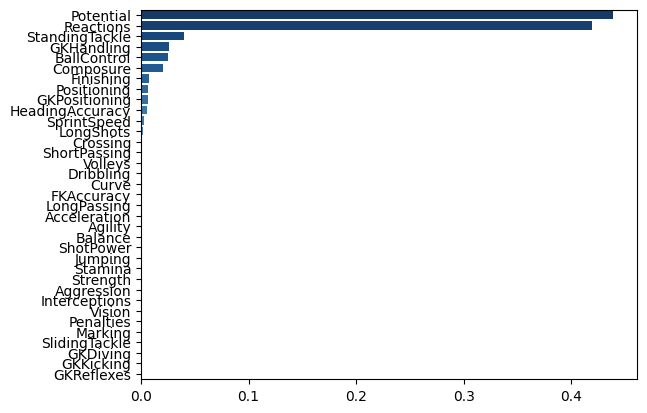

In [37]:
d = dict(sorted(dict(zip(train_X.columns, 
                         DTR.feature_importances_)).items(), 
                key=lambda item: item[1], 
                reverse=True))

sns.barplot(y=list(d.keys()), 
            x=list(d.values()),
            palette ='Blues_r')
plt.show()

In [38]:
Y_hat = pd.DataFrame(DTR.predict(test_X), columns=['Predicted Rating'])

In [32]:
predictions = pd.DataFrame()

In [51]:
test_Y_Rating = test_Y_Rating.reset_index()
test_X = test_X.reset_index()
predictions['ID'] = test_Y_Rating['ID']
predictions['Rating'] = test_Y_Rating['Overall']
predictions['DTR'] = Y_hat['Predicted Rating']

In [52]:
test_X = test_X.drop(['index'], axis=1)

In [42]:
#Hyperparameter tuning the Random Forest Regressor with Grid Search
RFR_parameters = {'criterion':['squared_error','poisson', 'absolute_error'],
                  'max_depth':[2,3,4,5,6,7,8,9,11],
                  'min_samples_leaf': [3,4,5,7,6,8,9,11,13]}

RFR_tune = GridSearchCV(estimator = RandomForestRegressor(random_state=0), 
                        param_grid = RFR_parameters,
                        scoring='r2',
                        cv=7)

RFR_tune.fit(train_X, train_Y)
RFR_tune.best_params_, RFR_tune.best_score_

({'criterion': 'poisson', 'max_depth': 11, 'min_samples_leaf': 3},
 0.8537402929949466)

In [43]:
#Instantiate our Random Forest Regressor and fit the model on the training data
RFR = RandomForestRegressor(**RFR_tune.best_params_, random_state=0)
RFR.fit(train_X,train_Y)

RandomForestRegressor(criterion='poisson', max_depth=11, min_samples_leaf=3,
                      random_state=0)

In [44]:
print('Training Data Accuracy score: {0:.2%}'. format(RFR.score(train_X, train_Y)))

Training Data Accuracy score: 95.84%


In [45]:
print('Testing Data Accuracy score: {0:.2%}'. format(RFR.score(test_X, test_Y)))

Testing Data Accuracy score: 88.89%


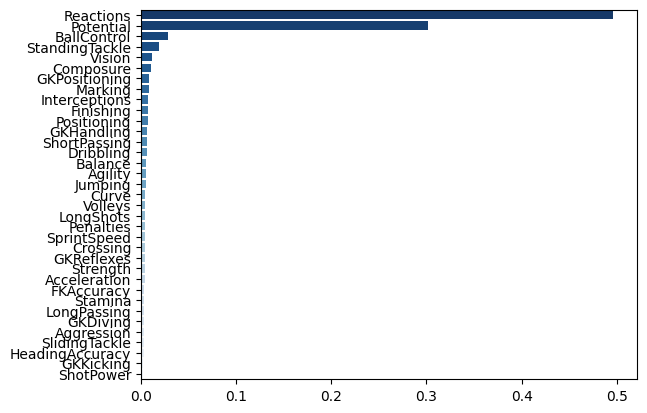

In [46]:
d = dict(sorted(dict(zip(train_X.columns, 
                         RFR.feature_importances_)).items(), 
                key=lambda item: item[1], 
                reverse=True))

sns.barplot(y=list(d.keys()), 
            x=list(d.values()),
            palette ='Blues_r')
plt.show()

In [47]:
predictions['RFR'] = pd.DataFrame(RFR.predict(test_X), columns=['Predicted Rating'])['Predicted Rating']

In [48]:
LR = sm.OLS(train_Y, train_X)

In [49]:
LR_results = LR.fit()

In [50]:
print(LR_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                Overall   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.879e+04
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                        0.00
Time:                        11:50:06   Log-Likelihood:                         -1658.6
No. Observations:                 900   AIC:                                      3387.
Df Residuals:                     865   BIC:                                      3555.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [51]:
print('Training Data MAPE: {0:.2%}'. format(mean_absolute_percentage_error(train_Y, LR_results.predict(train_X))))

Training Data MAPE: 1.51%


In [52]:
print('Testing Data MAPE: {0:.2%}'. format(mean_absolute_percentage_error(test_Y, LR_results.predict(test_X))))

Testing Data MAPE: 1.31%


In [53]:
LR_final = LinearRegression()

In [54]:
LR_final.fit(train_X,train_Y)

LinearRegression()

In [55]:
predictions['LR'] = LR_results.predict(test_X)

In [56]:
#Hyperparameter tuning the Gradient Boosting Regressor with Grid Search
GBR_parameters = {'loss':['squared_error','huber', 'absolute_error'],
                  'learning_rate':[.001,0.01,0.1],
                  'n_estimators': [250,500,1000,2000],
                  'criterion': ['friedman_mse', 'squared_error', 'mse']}

GBR_tune = GridSearchCV(estimator = GradientBoostingRegressor(random_state=0), 
                        param_grid = GBR_parameters,
                        scoring='r2',
                        cv=7)

GBR_tune.fit(train_X, train_Y)
GBR_tune.best_params_, GBR_tune.best_score_

({'criterion': 'friedman_mse',
  'learning_rate': 0.1,
  'loss': 'squared_error',
  'n_estimators': 1000},
 0.8914595053938247)

In [57]:
#Instantiate our Gradient Boosting Regressor and fit the model on the training data
GBR = GradientBoostingRegressor(**GBR_tune.best_params_, random_state=0)
GBR.fit(train_X,train_Y)

GradientBoostingRegressor(n_estimators=1000, random_state=0)

In [58]:
print('Training Data Accuracy score: {0:.2%}'. format(GBR.score(train_X, train_Y)))

Training Data Accuracy score: 99.96%


In [59]:
print('Testing Data Accuracy score: {0:.2%}'. format(GBR.score(test_X, test_Y)))

Testing Data Accuracy score: 90.78%


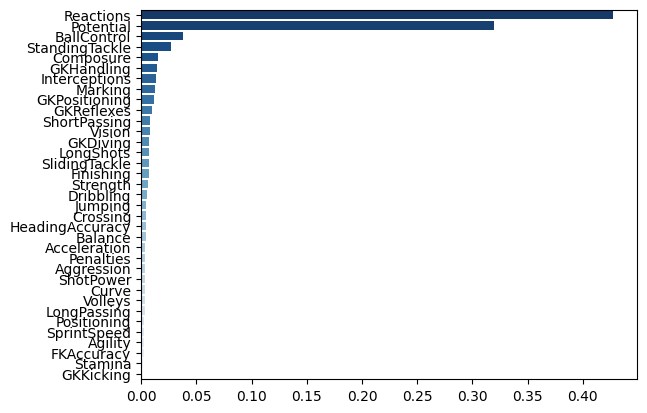

In [60]:
d = dict(sorted(dict(zip(train_X.columns, 
                         GBR.feature_importances_)).items(), 
                key=lambda item: item[1], 
                reverse=True))

sns.barplot(y=list(d.keys()), 
            x=list(d.values()),
            palette ='Blues_r')
plt.show()

In [61]:
predictions['GBR'] = pd.DataFrame(GBR.predict(test_X), columns=['Predicted Rating'])['Predicted Rating']

In [62]:
#Hyperparameter tuning the SVR with Grid Search
SVR_parameters = {'kernel': ['linear', 'rbf', 'poly'],
                  'C': [0.01, 0.1, 1, 10],
                  'epsilon': [0.01, 0.1, 1]}
SVR_model = SVR()

SVR_tune = GridSearchCV(estimator=SVR_model,
                        param_grid=SVR_parameters,
                        scoring='neg_mean_absolute_error',
                        cv=7)
SVR_tune.fit(train_X, train_Y)
SVR_tune.best_params_, SVR_tune.best_score_

({'C': 10, 'epsilon': 1, 'kernel': 'poly'}, -0.7712803411032219)

In [63]:
#Instantiate our SVR Regressor and fit the model on the training data
SVR = SVR(**SVR_tune.best_params_)
SVR.fit(train_X,train_Y)

SVR(C=10, epsilon=1, kernel='poly')

In [64]:
print('Training Data Accuracy score: {0:.2%}'. format(SVR.score(train_X, train_Y)))

Training Data Accuracy score: 93.83%


In [65]:
print('Testing Data Accuracy score: {0:.2%}'. format(SVR.score(test_X, test_Y)))

Testing Data Accuracy score: 91.84%


In [66]:
predictions['SVR'] = pd.DataFrame(SVR.predict(test_X), columns=['Predicted Rating'])['Predicted Rating']

In [69]:
# Define the hyperparameters for logistic regression and their possible values
LR_parameters = {
    'penalty': ['l1', 'l2'],           
    'C': [0.01, 0.1, 1, 10],          
    'solver': ['liblinear', 'lbfgs'],  
}

# Create a LogisticRegression instance
logistic_model = LogisticRegression(max_iter=10000)

# Create a GridSearchCV object
LR_tune = GridSearchCV(
    estimator=logistic_model,
    param_grid=LR_parameters,
    scoring='neg_mean_absolute_error',  
    cv=7  
)

# Fit the GridSearchCV object to your training data
LR_tune.fit(train_X, train_Y)

# Get the best hyperparameters and the corresponding score
LR_tune.best_params_, LR_tune.best_score_

({'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}, -1.5744134136212626)

In [72]:
#Instantiate our Logistic Regressor and fit the model on the training data
LR = LogisticRegression(**LR_tune.best_params_, random_state=0)
LR.fit(train_X,train_Y)

LogisticRegression(C=0.01, random_state=0)

In [73]:
print('Training Data Accuracy score: {0:.2%}'. format(LR.score(train_X, train_Y)))

Training Data Accuracy score: 26.56%


In [74]:
print('Testing Data Accuracy score: {0:.2%}'. format(LR.score(test_X, test_Y)))

Testing Data Accuracy score: 15.84%


In [83]:
#Ensemble Voting Regressor
VR = VotingRegressor([('DTR', DTR), ('RFR', RFR), ('LR', LR_final), ('GBR', GBR), ('SVR', SVR)])

In [84]:
VR = VR.fit(train_X, train_Y)

In [77]:
predictions['VR'] = VR.predict(test_X)

In [78]:
print('Training Data Accuracy score: {0:.2%}'. format(VR.score(train_X, train_Y)))

Training Data Accuracy score: 95.03%


In [79]:
print('Testing Data Accuracy score: {0:.2%}'. format(VR.score(test_X, test_Y)))

Testing Data Accuracy score: 91.68%


In [80]:
predictions.head(50)

ID  Rating   DTR        RFR         LR        GBR        SVR   
0   185431      79  79.0  78.799917  77.849511  78.675771  78.633066  \
1   205633      78  78.0  77.944619  77.489967  78.269791  78.171388   
2   171688      78  78.0  77.943286  78.496784  77.750785  78.898771   
3   161648      79  78.0  78.921741  76.998893  78.728098  77.185848   
4   231943      79  80.0  79.735038  82.361510  78.218492  80.073798   
5   231478      79  79.0  79.523939  80.731546  78.515601  78.983187   
6   213655      78  80.0  78.887655  78.612605  78.615793  77.373201   
7   190149      79  79.0  78.754027  78.273538  78.647890  78.825926   
8    49369      80  79.0  78.832591  77.306314  78.683452  79.268720   
9   195861      80  80.0  79.742956  80.217062  80.307100  79.519587   
10  176676      88  86.0  86.492846  87.128108  87.056644  87.473559   
11  173474      78  78.0  77.846190  78.526691  77.895784  78.132333   
12  193348      81  81.5  81.349222  81.306997  80.534777  80.830941   
13  224116      78  78.0  77.845353  76.042587  77.429125  78.175521   
14  184431      82  81.5  82.613440  79.112233  82.641400  83.499835   
15  186561      82  83.0  81.637385  81.390490  81.411994  80.809601   
16  212150      79  80.0  80.017301  79.593500  79.131766  80.899028   
17  137351      79  79.0  78.916452  79.826089  78.749436  79.552750   
18  208135      81  81.0  80.355561  80.767743  80.011366  80.271734   
19  106231      82  82.0  81.922484  83.680044  81.943717  82.722970   
20  216354      82  83.0  82.458732  82.545575  83.521419  83.299361   
21  230375      83  82.0  82.641843  83.350941  82.433842  82.963780   
22  189125      82  82.0  82.085626  82.833798  82.465443  82.152222   
23  188955      77  77.0  77.000000  76.546964  76.993419  77.454256   
24  163264      79  80.0  79.046364  78.602420  79.017831  79.186597   
25  199189      79  81.0  79.468270  79.625561  79.033915  78.599613   
26  140293      80  80.0  79.779772  80.086432  79.654854  80.247409   
27  205923      81  82.0  80.814659  80.266716  80.672256  80.337549   
28  227928      81  84.0  81.133749  82.116864  81.224974  80.339504   
29  137186      84  82.0  83.548289  81.845067  84.452892  83.919076   
30  187961      85  85.0  83.856666  84.677956  84.389879  85.133461   
31  197225      78  78.0  77.955889  78.231050  78.188766  78.297186   
32  239207      80  80.0  79.388506  80.010742  80.478849  79.998612   
33  202695      80  81.0  79.506866  80.255393  80.059233  80.037285   
34  202849      80  82.0  80.745037  80.251649  80.143758  82.013931   
35  186953      77  77.0  77.000000  76.029949  76.864274  76.700177   
36  212153      78  78.0  78.434651  77.220445  77.937199  77.575499   
37  208670      83  84.0  82.641174  83.195348  83.388738  83.146406   
38  202651      83  84.0  82.704770  82.254242  82.975967  84.703676   
39  210257      86  88.0  87.442198  89.492122  87.572472  87.271149   
40  193080      91  90.0  88.620005  92.942017  89.496316  91.588785   
41  205705      80  80.0  79.355815  75.994905  80.197788  78.307817   
42  192641      81  80.0  79.887649  81.057657  80.773645  80.443206   
43  205693      80  82.0  81.333765  80.363964  81.680971  81.205845   
44  208448      82  83.0  82.003152  81.706842  81.697120  81.149556   
45  208104      78  79.0  79.111183  78.080510  78.521122  77.831460   
46  187598      78  79.0  79.323214  79.880768  79.354325  79.189460   
47  192387      87  86.0  85.243262  84.809235  85.946435  86.084875   
48  221219      77  81.0  79.205976  77.218822  78.954598  77.832948   
49  185020      84  84.0  82.233367  81.306983  83.070384  83.982314   

           VR  
0   78.720731  
1   78.080553  
2   78.272957  
3   78.036544  
4   79.940327  
5   79.292893  
6   78.736751  
7   78.774535  
8   78.712630  
9   79.938175  
10  86.538872  
11  78.107383  
12  81.050139  
13  77.633704  
14  82.028651  
15  81.651117  
16  79.968964  
17  79.289591  
18  80.393632  
19  82.398315  

In [35]:
# Define the hyperparameter grid for Ridge Regression
ridge_parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

# Create a Ridge Regression model
ridge_model = Ridge()

# Create GridSearchCV object for Ridge Regression
ridge_tune = GridSearchCV(estimator=ridge_model,
                          param_grid=ridge_parameters,
                          scoring='r2',
                          cv=7)

# Fit the model on training data
ridge_tune.fit(train_X, train_Y)

# Print the best parameters and corresponding score
ridge_tune.best_params_, ridge_tune.best_score_

({'alpha': 100, 'solver': 'sparse_cg'}, 0.7503146292541872)

In [36]:
#Instantiate our Ridge Regressor and fit the model on the training data
RR = Ridge(**ridge_tune.best_params_)
RR.fit(train_X,train_Y)

Ridge(alpha=100, solver='sparse_cg')

In [37]:
print('Training Data Accuracy score: {0:.2%}'. format(RR.score(train_X, train_Y)))

Training Data Accuracy score: 77.82%


In [38]:
print('Testing Data Accuracy score: {0:.2%}'. format(RR.score(test_X, test_Y)))

Testing Data Accuracy score: 82.95%


In [15]:
# Define the hyperparameter grid for Lasso Regression
lasso_parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                    'selection': ['cyclic', 'random']}

# Create a Lasso Regression model
lasso_model = Lasso()

# Create GridSearchCV object for Lasso Regression
lasso_tune = GridSearchCV(estimator=lasso_model,
                          param_grid=lasso_parameters,
                          scoring='r2',
                          cv=7)

# Fit the model on training data
lasso_tune.fit(train_X, train_Y)

# Print the best parameters and corresponding score
lasso_tune.best_params_,lasso_tune.best_score_

({'alpha': 0.1, 'selection': 'random'}, 0.7520916255978465)

In [16]:
#Instantiate our Lasso Regressor and fit the model on the training data
LAR = Lasso(**lasso_tune.best_params_)
LAR.fit(train_X,train_Y)

Lasso(alpha=0.1, selection='random')

In [17]:
print('Training Data Accuracy score: {0:.2%}'. format(LAR.score(train_X, train_Y)))

Training Data Accuracy score: 77.70%


In [18]:
print('Testing Data Accuracy score: {0:.2%}'. format(LAR.score(test_X, test_Y)))

Testing Data Accuracy score: 82.94%


In [19]:
# Define the hyperparameter grid for Huber Regression
huber_parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                    'epsilon': [1.1, 1.2, 1.3, 1.4, 1.5]}

# Create a Huber Regression model
huber_model = HuberRegressor()

# Create GridSearchCV object for Huber Regression
huber_tune = GridSearchCV(estimator=huber_model,
                          param_grid=huber_parameters,
                          scoring='r2',
                          cv=7)

# Fit the model on training data
huber_tune.fit(train_X, train_Y)

# Print the best parameters and corresponding score
huber_tune.best_params_,huber_tune.best_score_


({'alpha': 1, 'epsilon': 1.5}, 0.7088015068137642)

In [20]:
#Instantiate our Huber Regressor and fit the model on the training data
HR = HuberRegressor(**huber_tune.best_params_)
HR.fit(train_X,train_Y)

HuberRegressor(alpha=1, epsilon=1.5)

In [21]:
print('Training Data Accuracy score: {0:.2%}'. format(HR.score(train_X, train_Y)))

Training Data Accuracy score: 74.30%


In [22]:
print('Testing Data Accuracy score: {0:.2%}'. format(HR.score(test_X, test_Y)))

Testing Data Accuracy score: 78.55%


In [23]:
# Define the hyperparameter grid for ElasticNet Regression
elasticnet_parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'max_iter': [1000, 2000, 3000]}

# Create an ElasticNet Regression model
elasticnet_model = ElasticNet()

# Create GridSearchCV object for ElasticNet Regression
elasticnet_tune = GridSearchCV(estimator=elasticnet_model,
                               param_grid=elasticnet_parameters,
                               scoring='r2',
                               cv=7)

# Fit the model on training data
elasticnet_tune.fit(train_X, train_Y)

# Print the best parameters and corresponding score
elasticnet_tune.best_params_, elasticnet_tune.best_score_


({'alpha': 0.1, 'l1_ratio': 0.9, 'max_iter': 1000}, 0.7519559825587674)

In [24]:
#Instantiate our ElasticNet Regressor and fit the model on the training data
ER = ElasticNet(**elasticnet_tune.best_params_)
ER.fit(train_X,train_Y)

ElasticNet(alpha=0.1, l1_ratio=0.9)

In [25]:
print('Training Data Accuracy score: {0:.2%}'. format(ER.score(train_X, train_Y)))

Training Data Accuracy score: 77.72%


In [29]:
print('Testing Data Accuracy score: {0:.2%}'. format(ER.score(test_X, test_Y)))

Testing Data Accuracy score: 82.96%


In [27]:
# Define the hyperparameter grid for KNN
knn_parameters = {'n_neighbors': [3, 5, 7, 9, 11],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}

# Create a KNN Regression model
knn_model = KNeighborsRegressor()

# Create GridSearchCV object for KNN Regression
knn_tune = GridSearchCV(estimator=knn_model,
                        param_grid=knn_parameters,
                        scoring='r2',
                        cv=7)

# Fit the model on training data
knn_tune.fit(train_X, train_Y)

# Print the best parameters and corresponding score
knn_tune.best_params_, knn_tune.best_score_

({'n_neighbors': 5, 'p': 1, 'weights': 'distance'}, 0.6680979847029697)

In [28]:
#Instantiate our KNN Regressor and fit the model on the training data
KNR = KNeighborsRegressor(**knn_tune.best_params_)
KNR.fit(train_X,train_Y)

KNeighborsRegressor(p=1, weights='distance')

In [30]:
print('Training Data Accuracy score: {0:.2%}'. format(KNR.score(train_X, train_Y)))

Training Data Accuracy score: 100.00%


In [31]:
print('Testing Data Accuracy score: {0:.2%}'. format(KNR.score(test_X, test_Y)))

Testing Data Accuracy score: 67.11%


In [40]:
test_Y_Rating = test_Y_Rating.reset_index()
test_X = test_X.reset_index()
predictions['ID'] = test_Y_Rating['ID']
predictions['Rating'] = test_Y_Rating['Overall']
test_X = test_X.drop(['index'], axis=1)

In [41]:
predictions['RR'] = RR.predict(test_X)
predictions['LAR'] = LAR.predict(test_X)
predictions['HR'] = HR.predict(test_X)
predictions['ER'] = ER.predict(test_X)
predictions['KNR'] = KNR.predict(test_X)

In [43]:
predictions.head(10)

ID  Rating         RR        LAR         HR         ER        KNR
0  185431      79  78.508975  78.477000  77.882817  78.481253  78.593484
1  205633      78  78.027854  78.042759  77.471586  78.039243  79.766013
2  171688      78  78.796903  78.870193  78.494435  78.861601  79.358449
3  161648      79  77.355345  77.349944  76.964402  77.347989  78.820661
4  231943      79  81.668611  81.718385  82.436859  81.714525  79.454236
5  231478      79  80.429378  80.436798  80.584450  80.433986  77.817851
6  213655      78  78.803050  78.833622  78.534344  78.830285  79.073307
7  190149      79  78.659020  78.772945  78.288803  78.763915  78.431405
8   49369      80  77.795231  77.751254  77.352829  77.758818  78.744668
9  195861      80  80.132103  80.041019  80.170552  80.051470  79.983675